In [33]:
import numpy as np
import seaborn as sns
import pandas as pd

In [34]:
ths = np.zeros((5, 50))

In [35]:
for i in range(5):
    d = np.load(f'results_strong_scale/experiment_{i}.npy', allow_pickle=True)
    start_time = d[0][1]
    for res, time in d:
        real_time = time - start_time
        ths[i, round(real_time / 5)] += 1


In [36]:
all = []
for rep in range(3):
    for time in range(48):
        all.append((time, ths[rep, time]))

In [37]:
df = pd.DataFrame(all, columns=['time', 'th'])

<AxesSubplot: xlabel='time', ylabel='th'>

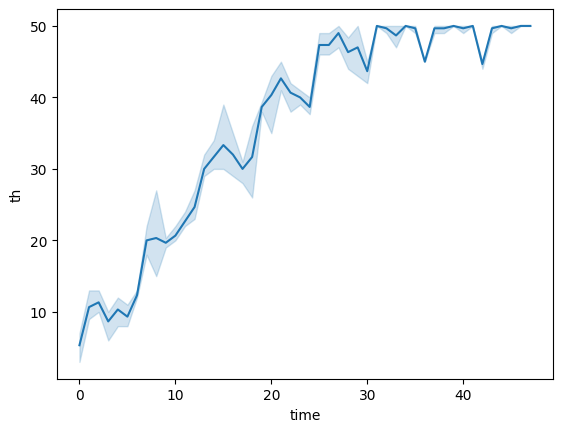

: 

In [38]:
sns.lineplot(data=df, x='time', y='th')